In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
cust = pd.read_csv('./Customer_info.csv')
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   고객ID    1468 non-null   object
 1   성별      1468 non-null   object
 2   고객지역    1468 non-null   object
 3   가입기간    1468 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 46.0+ KB


In [3]:
cust.describe(include='all')

,고객ID,성별,고객지역,가입기간
count,1468,1468,1468,1468.000000
unique,1468,2,5,NaN
top,USER_1358,여,California,NaN
freq,1,934,464,NaN
mean,NaN,NaN,NaN,25.912125
std,NaN,NaN,NaN,13.959667
min,NaN,NaN,NaN,2.000000
25%,NaN,NaN,NaN,14.000000
50%,NaN,NaN,NaN,26.000000
75%,NaN,NaN,NaN,38.000000


In [4]:
discnt = pd.read_csv('./Discount_info.csv')
discnt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   월       204 non-null    object
 1   제품카테고리  204 non-null    object
 2   쿠폰코드    204 non-null    object
 3   할인율     204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


In [5]:
discnt.describe(include='all')

,월,제품카테고리,쿠폰코드,할인율
count,204,204,204,204.000000
unique,12,17,48,NaN
top,Jan,Apparel,EXTRA10,NaN
freq,17,12,8,NaN
mean,NaN,NaN,NaN,20.000000
std,NaN,NaN,NaN,8.185052
min,NaN,NaN,NaN,10.000000
25%,NaN,NaN,NaN,10.000000
50%,NaN,NaN,NaN,20.000000
75%,NaN,NaN,NaN,30.000000


In [6]:
mkting = pd.read_csv('./Marketing_info.csv')
mkting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      365 non-null    object 
 1   오프라인비용  365 non-null    int64  
 2   온라인비용   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


In [7]:
mkting.describe(include='all')

,날짜,오프라인비용,온라인비용
count,365,365.000000,365.000000
unique,365,NaN,NaN
top,2019-01-01,NaN,NaN
freq,1,NaN,NaN
mean,NaN,2843.561644,1905.880740
std,NaN,952.292448,808.856853
min,NaN,500.000000,320.250000
25%,NaN,2500.000000,1258.600000
50%,NaN,3000.000000,1881.940000
75%,NaN,3500.000000,2435.120000


In [8]:
sales = pd.read_csv('./Onlinesales_info.csv')
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   고객ID    52924 non-null  object 
 1   거래ID    52924 non-null  object 
 2   거래날짜    52924 non-null  object 
 3   제품ID    52924 non-null  object 
 4   제품카테고리  52924 non-null  object 
 5   수량      52924 non-null  int64  
 6   평균금액    52924 non-null  float64
 7   배송료     52924 non-null  float64
 8   쿠폰상태    52924 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 3.6+ MB


In [9]:
sales.describe(include='all')

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
count,52924,52924,52924,52924,52924,52924.000000,52924.000000,52924.000000,52924
unique,1468,25061,365,1145,20,NaN,NaN,NaN,3
top,USER_0118,Transaction_12261,2019-11-27,Product_0981,Apparel,NaN,NaN,NaN,Clicked
freq,695,35,335,3511,18126,NaN,NaN,NaN,26926
mean,NaN,NaN,NaN,NaN,NaN,4.497638,52.237646,10.517630,NaN
std,NaN,NaN,NaN,NaN,NaN,20.104711,64.006882,19.475613,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000,0.390000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,1.000000,5.700000,6.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,1.000000,16.990000,6.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,2.000000,102.130000,6.500000,NaN


In [10]:
# 한 거래마다 한 명의 고객이 아님...!
# 거래 하나에 최대 8명
sales.groupby('거래ID').agg({'고객ID':'nunique'}).sort_values('고객ID',ascending=False).head(5)
# 고객ID와 거래ID를 같이 묶어서 groupby 해야하나...?

,고객ID
거래ID,
Transaction_6844,8
Transaction_13656,8
Transaction_16869,6
Transaction_9097,6
Transaction_4998,6


### 전처리: 새로운 거래ID 부여 (기존 거래ID -> old_거래ID)

In [11]:
made_tidx = sales.groupby(['고객ID', '거래ID'])['수량'].min().reset_index().reset_index()
made_tidx = made_tidx.assign(index=made_tidx['index'].astype('str').str.zfill(5))
made_tidx = made_tidx.assign(index=made_tidx['index'].apply(lambda x: 'Transaction_' + x))
made_tidx = made_tidx.rename(columns={'index':'new_거래ID'})
sales = sales.merge(made_tidx[['new_거래ID', '고객ID', '거래ID']], on=['고객ID', '거래ID'], how='left')
sales = sales.rename(columns={'거래ID':'old_거래ID', 'new_거래ID':'거래ID'})

In [12]:
# 한 거래마다 한 명의 고객
sales.groupby('거래ID').agg({'고객ID':'nunique'}).sort_values('고객ID',ascending=False).head(5)

,고객ID
거래ID,
Transaction_00000,1
Transaction_16645,1
Transaction_17761,1
Transaction_17760,1
Transaction_17759,1


In [13]:
tax = pd.read_csv('./Tax_info.csv')
tax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   제품카테고리  20 non-null     object 
 1   GST     20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 448.0+ bytes


In [14]:
tax.describe(include='all')

,제품카테고리,GST
count,20,20.000000
unique,20,NaN
top,Nest-USA,NaN
freq,1,NaN
mean,NaN,0.116500
std,NaN,0.052443
min,NaN,0.050000
25%,NaN,0.087500
50%,NaN,0.100000
75%,NaN,0.180000


In [15]:
### 전처리: 시계열 컬럼
discnt = discnt.assign(월=pd.to_datetime(discnt['월'], format='%b').dt.month)
mkting = mkting.assign(날짜=pd.to_datetime(mkting['날짜'], format='%Y-%m-%d'))
sales = sales.assign(거래날짜=pd.to_datetime(sales['거래날짜'], format='%Y-%m-%d'))

## merge (join)
- sales <-> cust: 고객ID
- sales <-> tax: 제품카테고리
- sales <-> mkting: 거래날짜 + 날짜
- sales <-> discnt: (거래날짜, 제품카테고리) + (월, 제품카테고리)

In [16]:
sales = sales.assign(월=sales['거래날짜'].dt.month)

In [17]:
sales = cust.merge(sales, how='right', on='고객ID')
sales = sales.merge(discnt, how='left', on=('월', '제품카테고리'))
sales = sales.merge(tax, how='left', on='제품카테고리')
sales = sales.merge(mkting, how='left', left_on='거래날짜', right_on='날짜')

In [18]:
# sales = sales.drop(columns='월')

In [19]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   고객ID      52924 non-null  object        
 1   성별        52924 non-null  object        
 2   고객지역      52924 non-null  object        
 3   가입기간      52924 non-null  int64         
 4   old_거래ID  52924 non-null  object        
 5   거래날짜      52924 non-null  datetime64[ns]
 6   제품ID      52924 non-null  object        
 7   제품카테고리    52924 non-null  object        
 8   수량        52924 non-null  int64         
 9   평균금액      52924 non-null  float64       
 10  배송료       52924 non-null  float64       
 11  쿠폰상태      52924 non-null  object        
 12  거래ID      52924 non-null  object        
 13  월         52924 non-null  int32         
 14  쿠폰코드      52524 non-null  object        
 15  할인율       52524 non-null  float64       
 16  GST       52924 non-null  float64       
 17  날짜        52

In [20]:
sales = sales.assign(총주문금액=sales['수량']*sales['평균금액'] * (1 - sales['할인율'] * 0.01) * sales['GST'] + sales['배송료'])

In [21]:
sales.describe(include='all').transpose()

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
고객ID,52924,1468,USER_0118,695,NaN,NaN,NaN,NaN,NaN,NaN,NaN
성별,52924,2,여,33007,NaN,NaN,NaN,NaN,NaN,NaN,NaN
고객지역,52924,5,Chicago,18380,NaN,NaN,NaN,NaN,NaN,NaN,NaN
가입기간,52924.0,NaN,NaN,NaN,26.127995,2.0,15.0,27.0,37.0,50.0,13.478285
old_거래ID,52924,25061,Transaction_12261,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
거래날짜,52924,NaN,NaN,NaN,2019-07-05 19:16:09.450532864,2019-01-01 00:00:00,2019-04-12 00:00:00,2019-07-13 00:00:00,2019-09-27 00:00:00,2019-12-31 00:00:00,NaN
제품ID,52924,1145,Product_0981,3511,NaN,NaN,NaN,NaN,NaN,NaN,NaN
제품카테고리,52924,20,Apparel,18126,NaN,NaN,NaN,NaN,NaN,NaN,NaN
수량,52924.0,NaN,NaN,NaN,4.497638,1.0,1.0,1.0,2.0,900.0,20.104711
평균금액,52924.0,NaN,NaN,NaN,52.237646,0.39,5.7,16.99,102.13,355.74,64.006882


In [22]:
# object / int, float (datetime) 따라서 hist 그래프 만드는 함수 만들기
def get_3_hist(data:pd.DataFrame, columns:list=None):
    """ 데이터와 컬럼을 전달하면 히스토그램을 3개씩 출력해주는 함수

    Args:
        data (pd.DataFrame): 데이터프레임
        columns (list): 컬럼 리스트
    """
    
    if columns==None:
        columns = data.columns.to_list()

    col_len = len(columns)
    if col_len < 3:
        col_len = 3
    
    plt.figure(figsize=(16, 5 * (col_len // 3)))

    for i, col in enumerate(columns):
        # 서브플롯 위치 설정
        plt.subplot(col_len // 3 + (col_len % 3 > 0), 3, i + 1)

        if 'id' in col.lower():
            df = data[col].value_counts()[:10]
            col += ' Top 10'

            plt.bar(df.index, df)
            """            
            for x,y in df.items():
                plt.text(x,y,y)
            """
        elif data[col].dtype == 'object':
            df = data[col].value_counts()
            if len(df) > 10:
                df = pd.concat([df[:9], pd.Series({'extra':df[9:].sum()})])
            plt.pie(df, autopct='%.1f%%', labels=df.index)
            # plt.legend(df.index, loc='upper left')
        else:
            plt.hist(data[col])

        plt.title(col)
        plt.xticks(rotation=90)
    
    # 전체 그림 표시
    plt.tight_layout()
    plt.show()

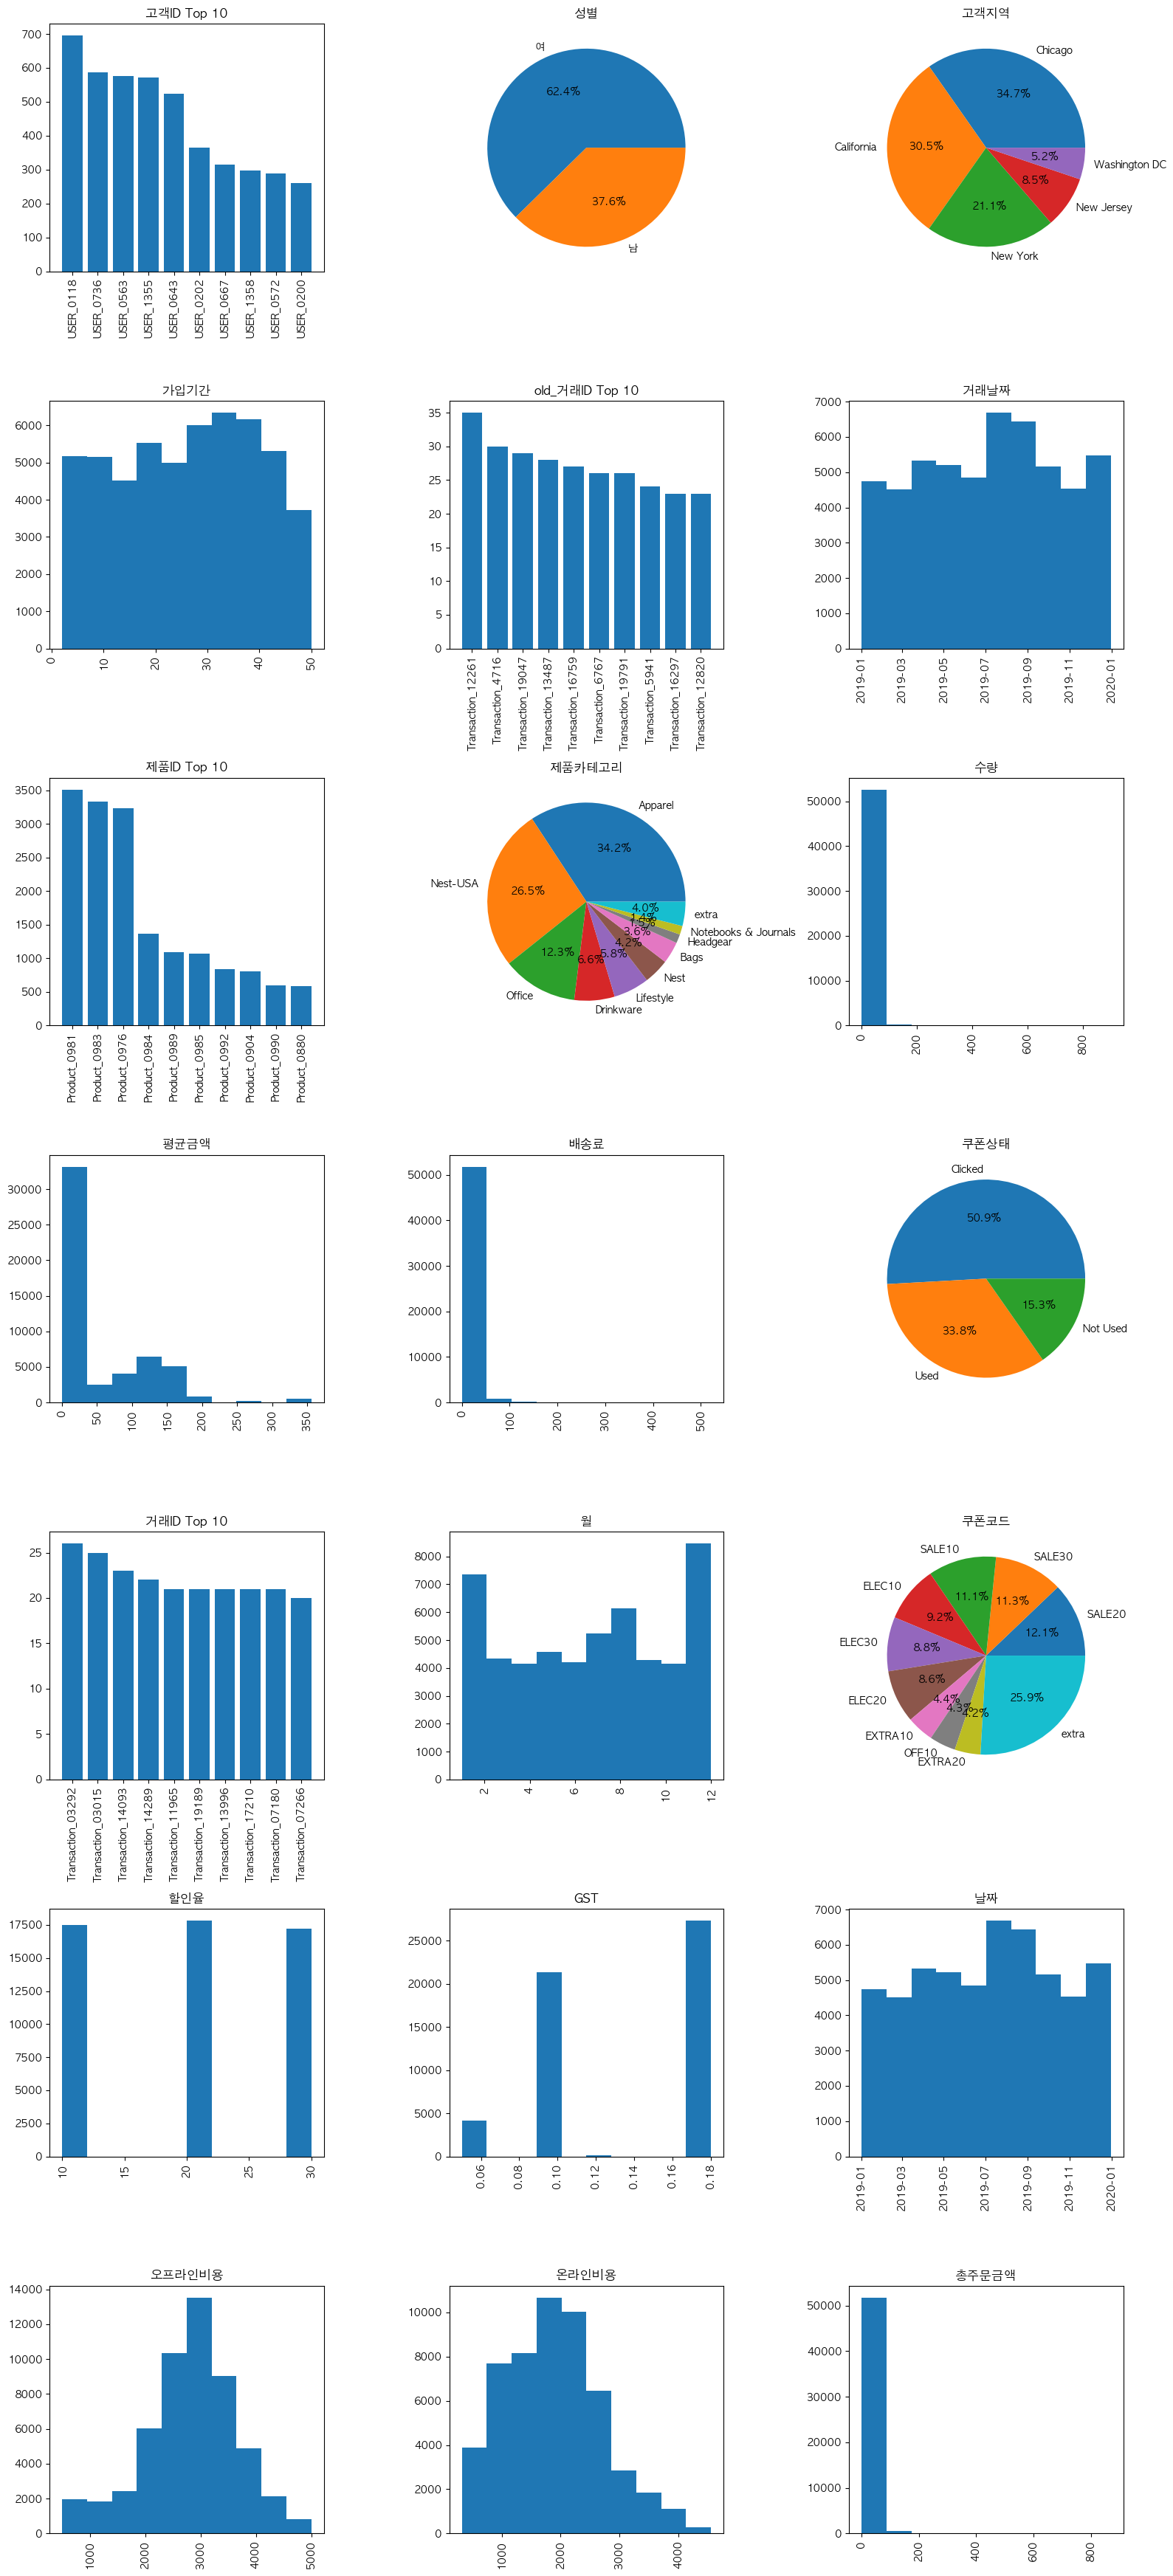

In [23]:
get_3_hist(sales)

- 쿠폰사용: Not Used에 Not Clicked도 포함되는 것일까..? 그렇지 않다면, 모두가 Clicked은 하고 -> Used/Not Used로 나뉘는 걸까...

**이상치: boxplot, IQR, z-score, DBscan -> SKIP!!**

In [24]:
sales.head(5)

,고객ID,성별,고객지역,가입기간,old_거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,...,쿠폰상태,거래ID,월,쿠폰코드,할인율,GST,날짜,오프라인비용,온라인비용,총주문금액
0,USER_1358,남,Chicago,12,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,...,Used,Transaction_24406,1,ELEC10,10.0,0.10,2019-01-01,4500,2424.5,20.3339
1,USER_1358,남,Chicago,12,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,...,Used,Transaction_24407,1,ELEC10,10.0,0.10,2019-01-01,4500,2424.5,20.3339
2,USER_1358,남,Chicago,12,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,...,Used,Transaction_24408,1,OFF10,10.0,0.10,2019-01-01,4500,2424.5,6.6845
3,USER_1358,남,Chicago,12,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,...,Not Used,Transaction_24409,1,SALE10,10.0,0.18,2019-01-01,4500,2424.5,20.6993
4,USER_1358,남,Chicago,12,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,...,Used,Transaction_24409,1,AIO10,10.0,0.18,2019-01-01,4500,2424.5,9.1730


In [56]:
# 지역별 집계
sales.groupby('고객지역').agg({'성별':pd.Series.mode, 
                           '가입기간':['min','mean', 'max'], 
                           '거래ID':'nunique', 
                           '제품카테고리': pd.Series.mode, 
                           '월':pd.Series.mode, 
                           '수량':['min','mean', 'max'],
                           '평균금액':['min', 'mean', 'max', 'sum'],
                           '배송료':['min', 'mean', 'max', 'sum'],
                           '총주문금액':['min', 'mean', 'max', 'sum'],
                           '쿠폰상태':pd.Series.mode})\
                           .style.background_gradient(axis=0).format(precision=2)

In [57]:
# 성별 집계
sales.groupby('성별').agg({'고객지역': pd.Series.mode, 
                         '가입기간':['min','mean', 'max'], 
                         '거래ID':'nunique', 
                         '제품카테고리': pd.Series.mode, 
                         '월':pd.Series.mode, 
                         '수량':['min','mean', 'max'],
                         '평균금액':['min', 'mean', 'max', 'sum'],
                         '배송료':['min', 'mean', 'max', 'sum'],
                         '총주문금액':['min', 'mean', 'max', 'sum'],                       
                         '쿠폰상태':pd.Series.mode})\
                           .style.background_gradient(axis=0).format(precision=2)

In [58]:
# 제품 카테고리별 집계
sales.groupby('제품카테고리').agg({'고객지역': pd.Series.mode, 
                             '성별': pd.Series.mode,
                             '가입기간':['min','mean', 'max'],
                             '거래ID':'nunique',
                             '월':pd.Series.mode,
                             '수량':['min','mean', 'max'],
                             '평균금액':['min', 'mean', 'max', 'sum'],
                             '배송료':['min', 'mean', 'max', 'sum'],
                             '총주문금액':['min', 'mean', 'max', 'sum'],
                             '쿠폰상태':pd.Series.mode})\
                           .style.background_gradient(axis=0).format(precision=2)

In [28]:
def value_top2_pct(x):
    if len(x)>2:
        from  itertools import islice
        tmp = x.value_counts(normalize=True).round(2).to_dict().items()
        return dict(islice(tmp,2))
    return x.value_counts(normalize=True).round(2).to_dict()

In [59]:
# 쿠폰 사용은 누가 더 많이, 어디에 많이 사용할까
sales.groupby('쿠폰상태').agg(
    {
        '고객지역': value_top2_pct, 
        '성별': value_top2_pct,
        '가입기간':['min', 'mean', 'max'],
        '거래ID':'nunique',
        '제품카테고리':value_top2_pct,
        '월':pd.Series.mode,
        '수량':['min', 'mean', 'max'],
        '평균금액':['min', 'mean', 'max', 'sum'],
        '총주문금액':['min', 'mean', 'max', 'sum'],
    }
).style.background_gradient(axis=0).format(precision=2)

- Chicago와 CA 지역 고객이 1,2순위로 많아서 그런지, 쿠폰상태별로도 1,2위를 차지함
- 성별, 제품카테고리 역시 전체 데이터에서의 비율과 유사한 분포
- 각 쿠폰상태별마다 전체 데이터에서의 비율과 유사한 분포를 보이고 있다.